# CNN and Computer Vision

## Part 4 - CNN

### Importing libraries and data

In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import pathlib
import cv2
import PIL
import glob

from sklearn.decomposition import PCA, IncrementalPCA

import keras
from keras.layers import Dense,Dropout, BatchNormalization, Activation, Flatten, Input
from keras.models import Sequential
from keras.activations import relu
from keras.optimizers import Adam,RMSprop,SGD
from keras.preprocessing.image import ImageDataGenerator
# from keras.utils import to_categorical

from keras.preprocessing import image

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as pr

In [ ]:
print(tf.__version__)

2.5.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


### Analyzing and Visualizing data

In [ ]:
train_folder='drive/My Drive/Projects/Computer Vision/jpg'

In [ ]:
data_dir_train = pathlib.Path(train_folder)

folder_train = list(data_dir_train.glob('*'))
images_train = list(data_dir_train.glob('*/*.jpg')) #list of all images (full path)
print('Folder Structure:')
for f in folder_train:
    print(f)
print('\nNumber of images: ', len(images_train))

Folder Structure:
drive/My Drive/Projects/Computer Vision/jpg/Flower 1
drive/My Drive/Projects/Computer Vision/jpg/Flower 2
drive/My Drive/Projects/Computer Vision/jpg/Flower 3
drive/My Drive/Projects/Computer Vision/jpg/Flower 4
drive/My Drive/Projects/Computer Vision/jpg/Flower 5
drive/My Drive/Projects/Computer Vision/jpg/Flower 6
drive/My Drive/Projects/Computer Vision/jpg/Flower 7
drive/My Drive/Projects/Computer Vision/jpg/Flower 8
drive/My Drive/Projects/Computer Vision/jpg/Flower 9
drive/My Drive/Projects/Computer Vision/jpg/Flower 10
drive/My Drive/Projects/Computer Vision/jpg/Flower 11
drive/My Drive/Projects/Computer Vision/jpg/Flower 12
drive/My Drive/Projects/Computer Vision/jpg/Flower 13
drive/My Drive/Projects/Computer Vision/jpg/Flower 14
drive/My Drive/Projects/Computer Vision/jpg/Flower 15
drive/My Drive/Projects/Computer Vision/jpg/Flower 16
drive/My Drive/Projects/Computer Vision/jpg/Flower 17

Number of images:  1360


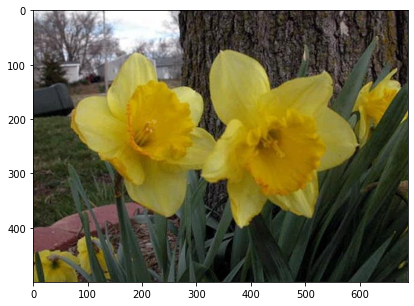

In [ ]:
filenames = glob.glob("drive/My Drive/Projects/Computer Vision/jpg/Flower 1/*.jpg")
filenames.sort()
images = [cv2.imread(img) for img in filenames]

plt.figure(figsize= (20,5));

plt.imshow(cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB));

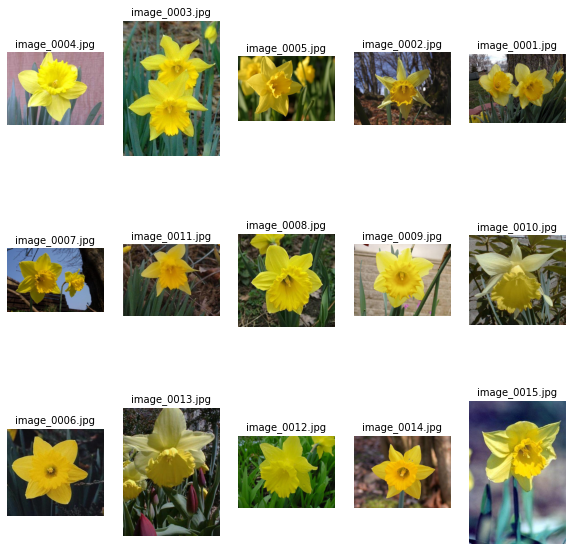

In [ ]:
fig = plt.figure(figsize=(10, 10))

for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.title(str(images_train[i]).split('/')[-1], fontsize=10) #get the file name and display as title
    plt.imshow(PIL.Image.open(images_train[i]))
    ax = plt.axis("off")

### Model Building

In [ ]:
image_size = 226
batch_size = 28

In [ ]:
idg = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    #rotation_range=20, # You can uncomment these parameters to make you generator rotate & flip the images to put the train model in stricter conditions.
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2
)

In [ ]:
train_gen = idg.flow_from_directory('drive/My Drive/Projects/Computer Vision/jpg',
                                                    target_size=(image_size, image_size),
                                                    subset='training',
                                                    class_mode='categorical',
                                                    batch_size=batch_size,
                                                    shuffle=True,
                                                    seed=1
                                                )

Found 1088 images belonging to 17 classes.


In [ ]:
val_gen = idg.flow_from_directory('drive/My Drive/Projects/Computer Vision/jpg',
                                                   target_size=(image_size, image_size),                                                   
                                                   subset='validation',
                                                   class_mode='categorical',
                                                   batch_size=batch_size,
                                                   shuffle=True,
                                                   seed=1
                                                )

Found 272 images belonging to 17 classes.


In [ ]:
classes = train_gen.class_indices
print(classes)
class_names = []
for c in classes:
    class_names.append(c)
print('The name of the classes are: ', class_names)

{'Flower 1': 0, 'Flower 10': 1, 'Flower 11': 2, 'Flower 12': 3, 'Flower 13': 4, 'Flower 14': 5, 'Flower 15': 6, 'Flower 16': 7, 'Flower 17': 8, 'Flower 2': 9, 'Flower 3': 10, 'Flower 4': 11, 'Flower 5': 12, 'Flower 6': 13, 'Flower 7': 14, 'Flower 8': 15, 'Flower 9': 16}
The name of the classes are:  ['Flower 1', 'Flower 10', 'Flower 11', 'Flower 12', 'Flower 13', 'Flower 14', 'Flower 15', 'Flower 16', 'Flower 17', 'Flower 2', 'Flower 3', 'Flower 4', 'Flower 5', 'Flower 6', 'Flower 7', 'Flower 8', 'Flower 9']


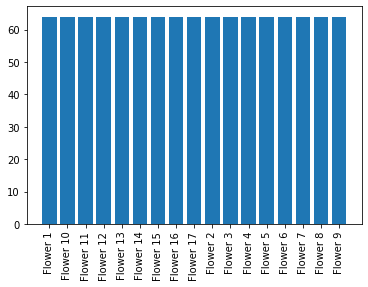

In [ ]:
unique, counts = np.unique(train_gen.classes, return_counts=True)
dict1 = dict(zip(train_gen.class_indices, counts))

keys = dict1.keys()
values = dict1.values()

plt.xticks(rotation='vertical')
bar = plt.bar(keys, values)

In [ ]:
model_cnn = tf.keras.models.Sequential()

# Input layer
# Can be omitted, you can specify the input_shape in other layers
model_cnn.add(tf.keras.layers.InputLayer(input_shape=(image_size,image_size,3,)))

# Here we add a 2D Convolution layer
model_cnn.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))

# Max Pool layer 
# It downsmaples the input representetion within the pool_size size
model_cnn.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))

# Normalization layer
# The layer normalizes its output using the mean and standard deviation of the current batch of inputs.
model_cnn.add(tf.keras.layers.BatchNormalization())

# 2D Convolution layer
model_cnn.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), strides = (1,1), activation='relu'))

# Max Pool layer 
model_cnn.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))

# Normalization layer
model_cnn.add(tf.keras.layers.BatchNormalization())

# 2D Convolution layer
model_cnn.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), strides = (1,1), activation='relu'))

# Max Pool layer 
model_cnn.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))

# Normalization layer
model_cnn.add(tf.keras.layers.BatchNormalization())

# 2D Convolution layer
model_cnn.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), strides = (1,1), activation='relu'))

# Max Pool layer 
model_cnn.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))

# Global Max Pool layer
model_cnn.add(tf.keras.layers.GlobalMaxPool2D())

# Dense Layers after flattening the data
model_cnn.add(tf.keras.layers.Flatten())

model_cnn.add(tf.keras.layers.Dense(128, activation='relu'))

# Dropout
# is used to nullify the outputs that are very close to zero and thus can cause overfitting.
model_cnn.add(tf.keras.layers.Dropout(0.2))
model_cnn.add(tf.keras.layers.Dense(64, activation='relu'))

# Normalization layer
model_cnn.add(tf.keras.layers.BatchNormalization())

#Add Output Layer
model_cnn.add(tf.keras.layers.Dense(17, activation='softmax')) # = 17 predicted classes

In [ ]:
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 112, 112, 64)      256       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 110, 110, 128)     73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 55, 55, 128)       0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 55, 55, 128)       512       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 53, 53, 256)      

In [ ]:
# You can save the best model to the checkpoint
checkpoint = tf.keras.callbacks.ModelCheckpoint('cnn_classifier.h5', #where to save the model
                                                    save_best_only=True, 
                                                    monitor='val_accuracy', 
                                                    mode='max', 
                                                    verbose = 1)

In [ ]:
history = model_cnn.fit(train_gen,
          epochs=15, 
          steps_per_epoch= 1088//batch_size,  # Number of train images // batch_size
          validation_data=val_gen,
          validation_steps = 272//batch_size, # Number of val images // batch_size
          callbacks = [checkpoint],
          verbose = 1
)

Epoch 1/15
38/38 [==============================] - 383s 10s/step - loss: 2.7276 - accuracy: 0.1585 - val_loss: 2.7574 - val_accuracy: 0.1071

Epoch 00001: val_accuracy improved from -inf to 0.10714, saving model to cnn_classifier.h5
Epoch 2/15
38/38 [==============================] - 380s 10s/step - loss: 2.1493 - accuracy: 0.2906 - val_loss: 2.7934 - val_accuracy: 0.0992

Epoch 00002: val_accuracy did not improve from 0.10714
Epoch 3/15
38/38 [==============================] - 379s 10s/step - loss: 1.8823 - accuracy: 0.3849 - val_loss: 2.8019 - val_accuracy: 0.1190

Epoch 00003: val_accuracy improved from 0.10714 to 0.11905, saving model to cnn_classifier.h5
Epoch 4/15
38/38 [==============================] - 379s 10s/step - loss: 1.7579 - accuracy: 0.4075 - val_loss: 2.7610 - val_accuracy: 0.1270

Epoch 00004: val_accuracy improved from 0.11905 to 0.12698, saving model to cnn_classifier.h5
Epoch 5/15
38/38 [==============================] - 378s 10s/step - loss: 1.6152 - accuracy: 0

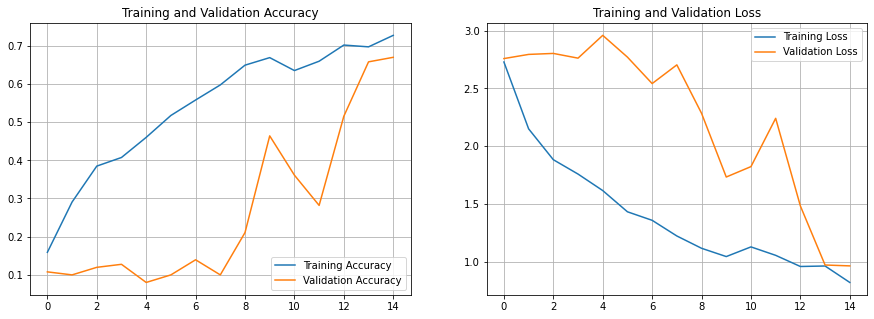

In [ ]:
epochs = 15

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid()

plt.show()

The max accuracy achieved using CNN is 67.06 after 15 epochs.